In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
df = pd.read_csv('продажи 2023 с характеристиками_коррект.csv', encoding='utf-8', sep=',', low_memory=False)
pd.set_option('display.max_columns', None)
df.head(5)

,uid,name,category1_name,category2_name,category3_name,category4_name,brand_name,color,size,quantity,uid_doc,customer_key,discount_sum,total_sum,prod_unit_price,date_time_0,fill_power,r_value,baro,wireless_en,back_pocket,vent_back,vent_zip,vent_helmet,activity_type,rope_type,carab_lock_type,sling_type,warming_type,waterproof_back,sleep_bag_person,inner_short,sl_bag_collar,cloth_collar,gps,bag_valve,heart_monitor,outer_battery,height,boot_height,inner_tent_height,rub_boot_height,mat_compact_size,outer_size,tent_outer_size,water_resist,hydro_compl,depth,food_ready,breast_lock,rope_diameter,rope_length,pants_lenght,socks_lenght,sl_bag_length,sl_bag_height,bp_access,boot_rigid,back_pocket_2access,closed_toe,uf_filter,battery_type,hood,waist_pocket,shirt_pocket,bottle_pockets,filter_cat,entry_num,person_num,buckles_num,layers_num,vestibule_num,compression,sandals_const,boot_const,pants_const,hammock_const,stove_const,tent_const,helmet_const,bottle_fast,iceaxe_fast,poles_fast,helmet_fast,pants_cut,pant_boot_hook,bag_hook,main_axe_load,material_textile,poles_material,carabiner_material,membraine_type,pole_fold_type,zip,shin_zip,mosq_mesh,bottles_compl,carbide_tip,membraine,carab_lock,cape_compl,impregn,piezo,low_comf_temp,volume,surface_boot,gender,waist_belt,m_or_bay,pronation,noteb_pock_size,boot_ewlt,real_weight,back_size_modif,belt_pants,season,lacing_sys,country_origine,skeleton_remove,valve_remove,belt_remove,protect_techno,furniture_type,knife_type,scarf_type,electro_type,ballon_type,dish_type,fuel_type,carabin_type,mat_type,zip_type,boot_type,harness_type,type_of_good,stitch_type,insulation,mat_shape,sl_bag_shape,color_filter,width,sl_b_leg_width,sl_b_should_width
0,00e7d508-7577-11e9-80ca-901b0e95a2a8,Тент ENO ProFly XL Sil Lichen,Палатки,Тенты и противомоскитные пологи,NaN,NaN,ENO,Lichen,1sz,1.0,92bc91f8-e436-11ed-811e-002590d0f723,5f5501ff-0f71-11ea-80ca-901b0e95a2a8,2580.0,10320.0,12900.0,2023-04-26 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"11,4 x 22,9 см",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Для гамака,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,709",NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Тент,NaN,NaN,NaN,NaN,зелёный/,NaN,NaN,NaN
1,00e7d508-7577-11e9-80ca-901b0e95a2a8,Тент ENO ProFly XL Sil Lichen,Палатки,Тенты и противомоскитные пологи,NaN,NaN,ENO,Lichen,1sz,1.0,55fff634-f1c0-11ed-9550-3c7c3fbeb7a6,2b478c78-f3a7-11ea-80cc-901b0e95a2a8,2580.0,10320.0,12900.0,2023-05-13 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"11,4 x 22,9 см",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Для гамака,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,709",NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Тент,NaN,NaN,NaN,NaN,зелёный/,NaN,NaN,NaN
2,00e7d508-7577-11e9-80ca-901b0e95a2a8,Тент ENO ProFly XL Sil Lichen,Палатки,Тенты и противомоскитные пологи,NaN,NaN,ENO,Lichen,1sz,1.0,8a54e0a2-e78e-11ed-811e-002590d0f723,3ec35b73-9059-11e4-80c3-002590d0f723,2580.0,10320.0,12900.0,2023-04-30 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"11,4 x 22,9 см",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Для гамака,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,709",NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
doc_groups = df.groupby('uid_doc')['uid'].apply(list).reset_index()

In [8]:
edges = {}
for _, row in doc_groups.iterrows():
    product_ids = row['uid']
    for product_id in product_ids:
        for pid in product_ids:
            if pid != product_id:
                edge = (product_id, pid)
                if edge not in edges:
                    edges[edge] = 1
                else:
                    edges[edge] += 1   
edges_list = [(edge[0], edge[1], weight) for edge, weight in edges.items()]

In [10]:
G=nx.MultiGraph()

In [12]:
G.add_weighted_edges_from(edges_list)

In [14]:
import networkx as nx
import community.community_louvain as community_louvain

# Обнаружение сообществ с помощью алгоритма Лувена ; возвращает словарь {элемент : номер партиции, }
partition = community_louvain.best_partition(G)

In [16]:
# Распечатать обнаруженные сообщества
#print(partition)

In [18]:
#modularity = community.modularity(partition, G, weight='weight')

In [20]:
num_unique_values = len(set(partition.values()))
num_unique_keys = len(set(partition.keys()))
print(num_unique_values, num_unique_keys)

40 11130


In [22]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt


C:\Users\anast\AppData\Local\Temp\ipykernel_19148\86820235.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


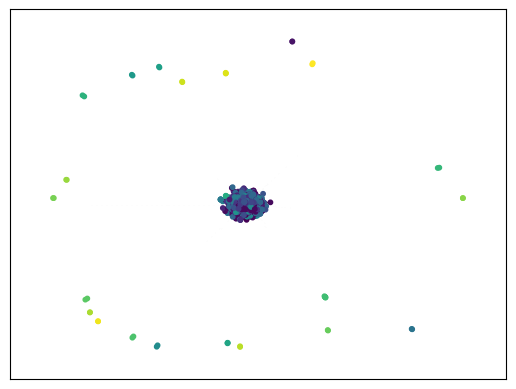

In [24]:

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

In [36]:
from bokeh.io import output_file, show
from bokeh.plotting import figure, from_networkx
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool)
from bokeh.palettes import Viridis256
import plotly.graph_objects as go

In [44]:
mapping = dict((n, i) for i, n in enumerate(G.nodes))
H = nx.relabel_nodes(G, mapping)

In [46]:
colors = [Viridis256[value*6] for value in list(partition.values())]

plot = figure(title="Transaction Graph", x_range=(-1.1,1.1), y_range=(-1.1,1.1), active_scroll='wheel_zoom', toolbar_location=None)
graph = from_networkx(H, nx.spring_layout, scale=2, center=(0,0))
graph.node_renderer.data_source.data['colorss'] = colors
graph.node_renderer.glyph.update(size=5, fill_color="colorss")
#graph.node_renderer.glyph = Circle(radius=5, fill_color=colors)
plot.renderers.append(graph)
show(plot)

In [48]:
A = nx.adjacency_matrix(G)

In [50]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA()

In [56]:
def analyzePCA(X, pca, explained_threshold=0.95):
    """Plot cumulative explaned variance of PCA"""
    pca.fit(X)
    pca_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(15,7))
    plt.plot(np.cumsum(pca_variance))
    plt.hlines(explained_threshold, 0, len(pca_variance))
    plt.title("Number of components to explain {}% of variance: {}".format(
        100*explained_threshold, np.argwhere(np.cumsum(pca_variance)>0.95)[0]
    ))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

In [58]:
analyzePCA(A, pca)

TypeError: PCA only support sparse inputs with the "arpack" solver, while "auto" was passed. See TruncatedSVD for a possible alternative.

In [60]:
from sklearn.decomposition import TruncatedSVD

In [62]:
svd = TruncatedSVD()

In [64]:
def analyzeSVD(X, svd, explained_threshold=0.95):
    """Plot cumulative explaned variance of svd"""
    svd.fit(X)
    svd_variance = svd.explained_variance_ratio_
    plt.figure(figsize=(15,7))
    plt.plot(np.cumsum(svd_variance))
    plt.hlines(explained_threshold, 0, len(svd_variance))
    plt.title("Number of components to explain {}% of variance: {}".format(
        100*explained_threshold, np.argwhere(np.cumsum(svd_variance)>0.95)[0]
    ))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

IndexError: index 0 is out of bounds for axis 0 with size 0

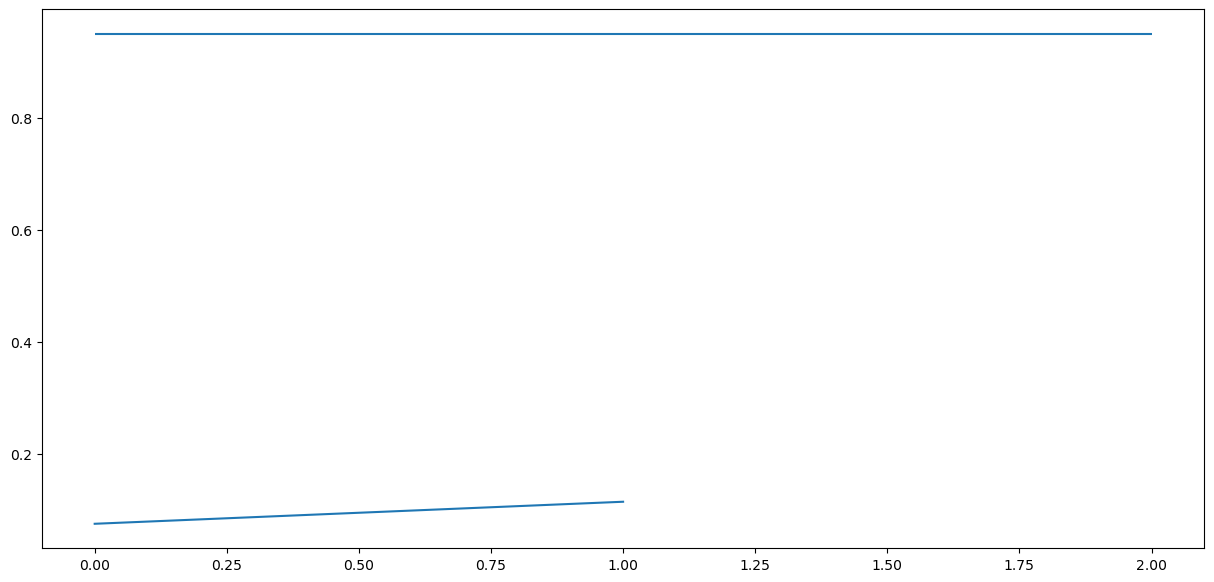

In [66]:
analyzeSVD(A, svd)

In [46]:
from sklearn.cluster import SpectralClustering

Это дальше не работает, не запускать! долго-долго пытается, потом падает (без ошибок, просто падает)

In [ ]:
clustering = SpectralClustering(n_clusters=350, assign_labels='discretize', random_state=0).fit(A)
clustering.labels_

C:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_spectral.py:701: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
#A = tf.convert_to_tensor(A.todense(), dtype=tf.float32)